# Scatter Plotter Demo
This notebook is a tutorial for how to use the ScatterPlotter functionality in detanalysis, which is a helpful way to be able to inspect individual traces from a scatter plot of RQ values.

Often when looking at a scatter plot of say OFAmp vs. Chi2, or event_time vs. baseline, we ask ourselves, what's going on with that population over there? This tool is designed to help you answer that question. You click on points in the scatter plot, and then can easily look at the traces associated with that event.

An earlier version of this script popped windows out of the notebook using QT5, this notebook uses widget to keep the interactive windows in the notebook. Note that this differs from the standard way matplotlib figures are shown in notebooks, and may not be what you want in all your analyses, so it may be best to keep ScatterPlotter running in a separate notebook.

This package was written by Roger Romani in May 2023, feel free to reach out with questions.

In [2]:
#first, some imports

import numpy as np
from detanalysis import Analyzer, ScatterPlotter

Here, we set the matplotlib enviornment to one we can interact with, rather than the default (which essentially returns images).

In [3]:
%matplotlib widget

Let's load in some real data, so we have something to take a look at.

In [4]:
continuous_data_path = '/sdata1/runs/run26/raw/continuous_I2_D20230320_T112814'
path_to_dataframe = '/sdata1/runs/run26/processed/continuous_I2_D20230320_T112814/feature_I2_D20230824_T003527'

myanalyzer = Analyzer(path_to_dataframe, series=None)
# function "add_files" can be used afterwards if needed

# show number of events 
myanalyzer.describe()

#this is our vaex dataframe
df = myanalyzer.df


Number of files: 17
Number of events: 461274
Number of features: 143
Is DataFrame filtered? False
No cuts have been registered!
No derived features have been added!


Let's take a look at the column names for the vaex dataframe we just loaded to see what RQ names to use when making scatter plots:

In [5]:
print(df.get_column_names()[0:20])

['amp_of1x1_constrained_Melange025pcLeft', 'amp_of1x1_constrained_Melange025pcRight', 'amp_of1x1_constrained_Melange1pc1ch', 'amp_of1x1_constrained_single_Melange025pcLeft', 'amp_of1x1_constrained_single_Melange025pcRight', 'amp_of1x1_constrained_single_Melange1pc1ch', 'amp_of1x1_nodelay_Melange025pcLeft', 'amp_of1x1_nodelay_Melange025pcRight', 'amp_of1x1_nodelay_Melange1pc1ch', 'amp_of1x1_nodelay_single_Melange025pcLeft', 'amp_of1x1_nodelay_single_Melange025pcRight', 'amp_of1x1_nodelay_single_Melange1pc1ch', 'ampres_of1x1_constrained_Melange025pcLeft', 'ampres_of1x1_constrained_Melange025pcRight', 'ampres_of1x1_constrained_Melange1pc1ch', 'ampres_of1x1_constrained_single_Melange025pcLeft', 'ampres_of1x1_constrained_single_Melange025pcRight', 'ampres_of1x1_constrained_single_Melange1pc1ch', 'baseline_Melange025pcLeft', 'baseline_Melange025pcRight']


Now, we can initialize the ScatterPlotter object we'll use to plot RQs and event traces. To initialize, we need a vaex dataframe (loaded above), a path to the triggered data (set above), as well as the names of the RQs we're plotting and the names to display on the plot.

In [6]:
SP = ScatterPlotter(df, continuous_data_path, 
                    'amp_of1x1_nodelay_Melange025pcRight', 'lowchi2_of1x1_nodelay_Melange025pcRight',
                    'OFAmp, Nodelay, Right (s)', 'OFChi2, Nodelay, Right',
                    title = "Run 26")

We'll be working with the SP object we just created when making plots to pick events out of, and ones of the picked events.

First, let's make the scatter plot we can select events from. After running the cell below, click on the points in the plot that you want to inspect the traces of. Nothing should happen at the moment, we'll plot those traces later.

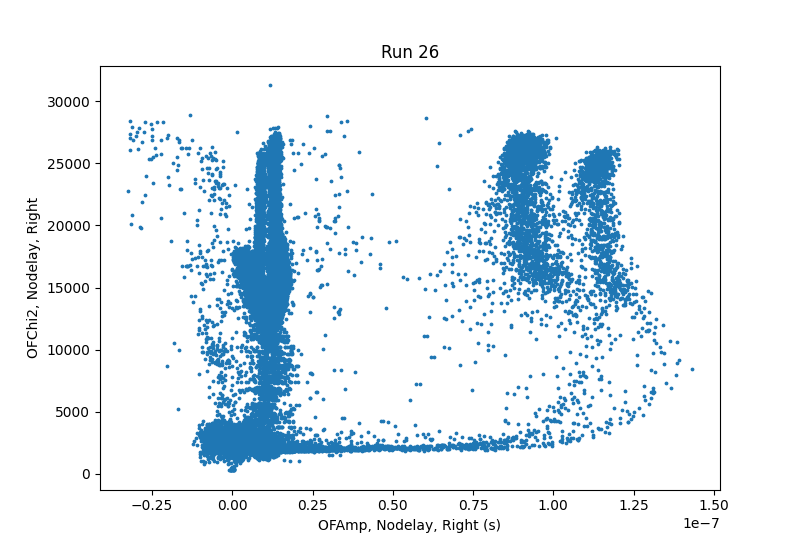

In [7]:
SP.plot_picking_scatter()

Before plotting those traces, let's make sure we picked traces. To do this, we can look at the picked_inds attribute of the ScatterPlotter object in question. This is a list of the indices of the points we've clicked on, as in their location in the list of points from which the scatter point was constructed. 

In [8]:
print(SP.picked_inds)

[379400, 159178, 46170, 16490, 52418]


To clear the list of points to pick, we can simply set the attribute to an empty list:

In [9]:
SP.picked_inds = []
print(SP.picked_inds)

[]


Now, let's reselect a few points, and show how to plot the traces.

In [10]:
print(SP.picked_inds)

[57567]


Picking additional points in the scatter plot adds to the list:

In [11]:
print(SP.picked_inds)

[57567, 46170, 148976]


Now, let's show how to plot the traces.

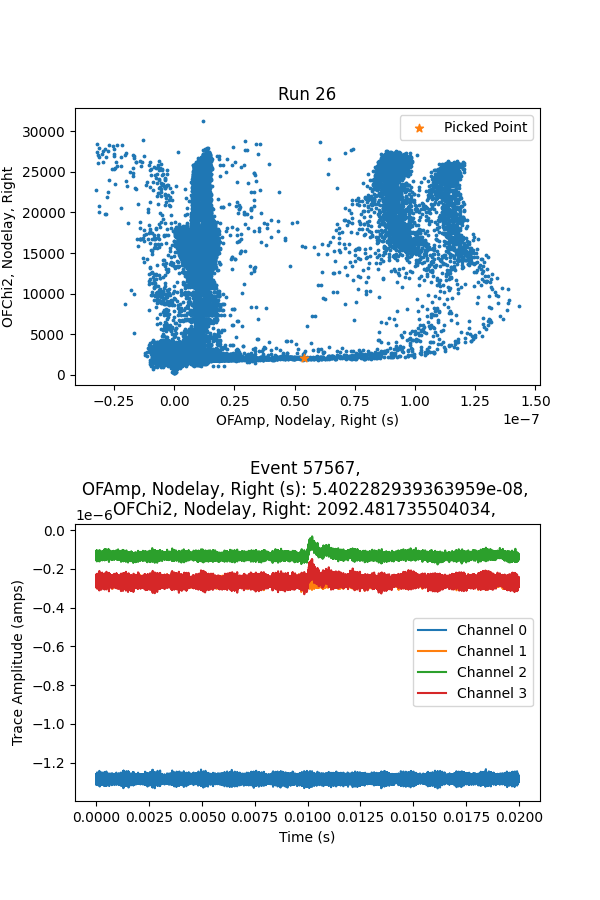

 
-----------------
 


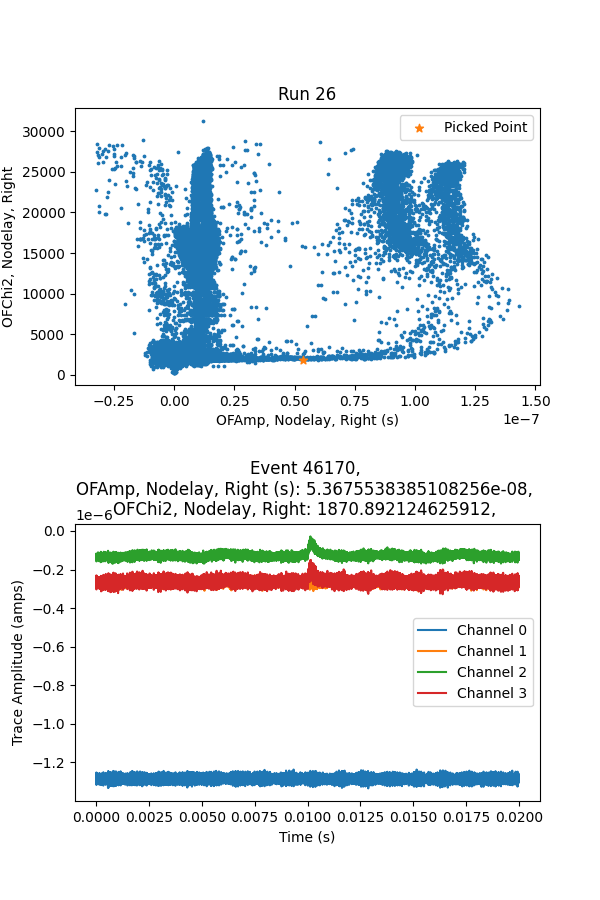

 
-----------------
 


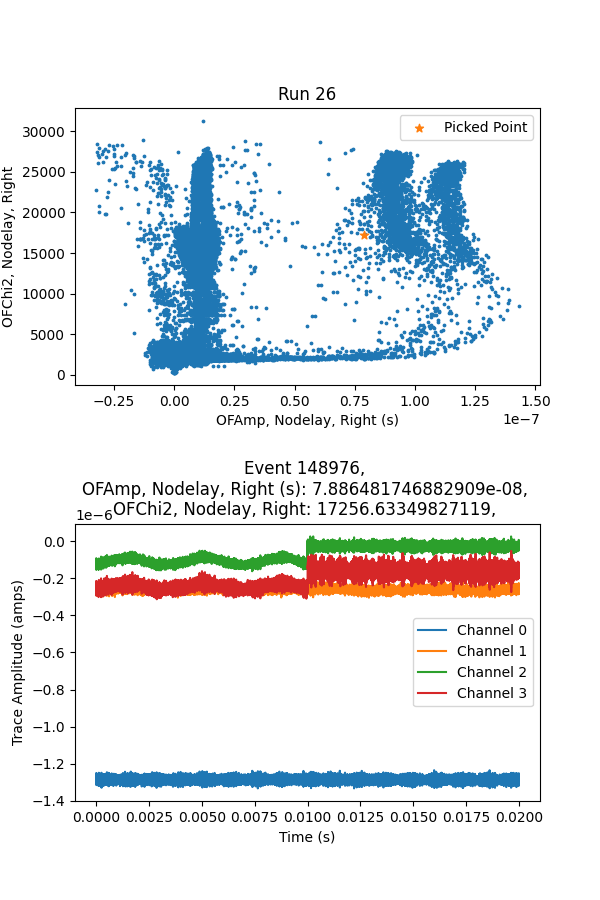

 
-----------------
 


In [12]:
SP.plot_picked_events(trace_length_msec=20, pretrigger_length_msec=10)

Notice that for the first event (and really every event), the data has a lot of high frequency noise in it, so it's a bit hard to see what's going on. We can low pass filter the output traces and replot to show them a bit more clearly:

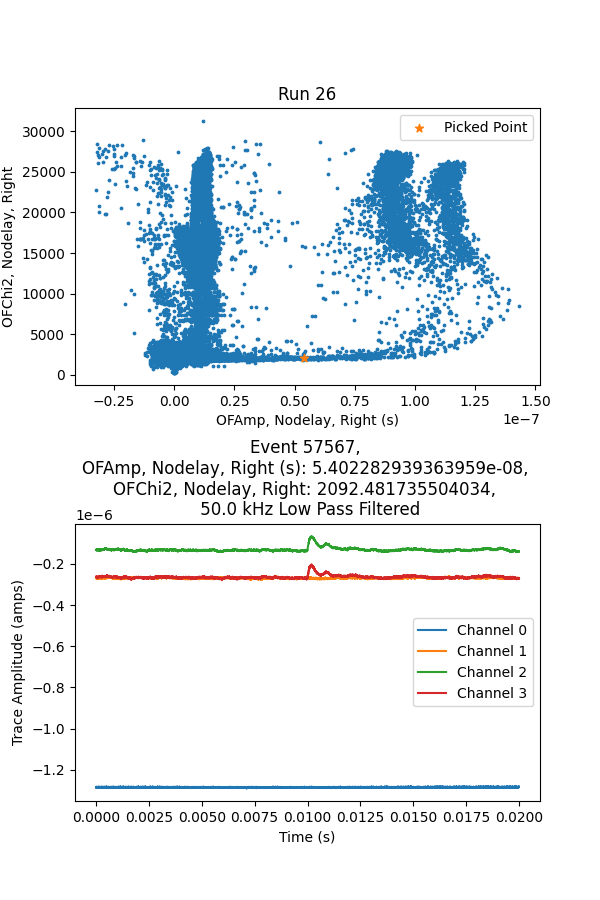

 
-----------------
 


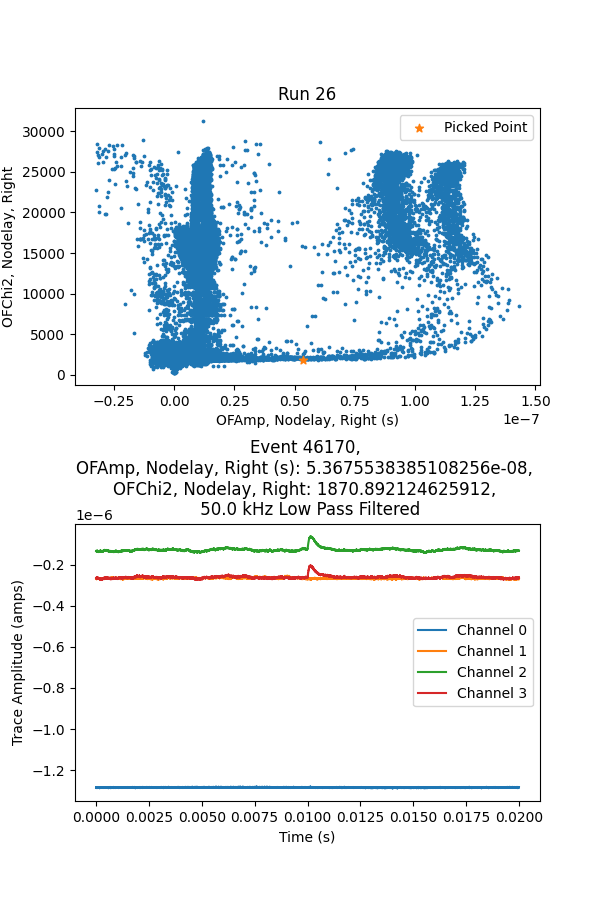

 
-----------------
 


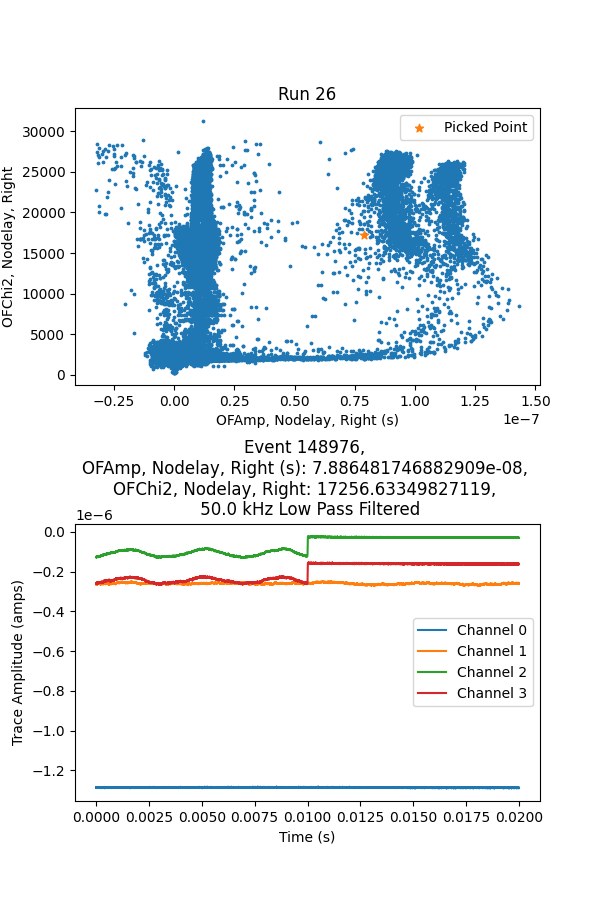

 
-----------------
 


In [13]:
SP.plot_picked_events(lpcutoff=50e3,trace_length_msec=20, pretrigger_length_msec=10)

Suppose that we're only interested in two of the four channels, and want to label them for clarity. We can then specify which channels to plot, and their names for the legend. We can also change trace length

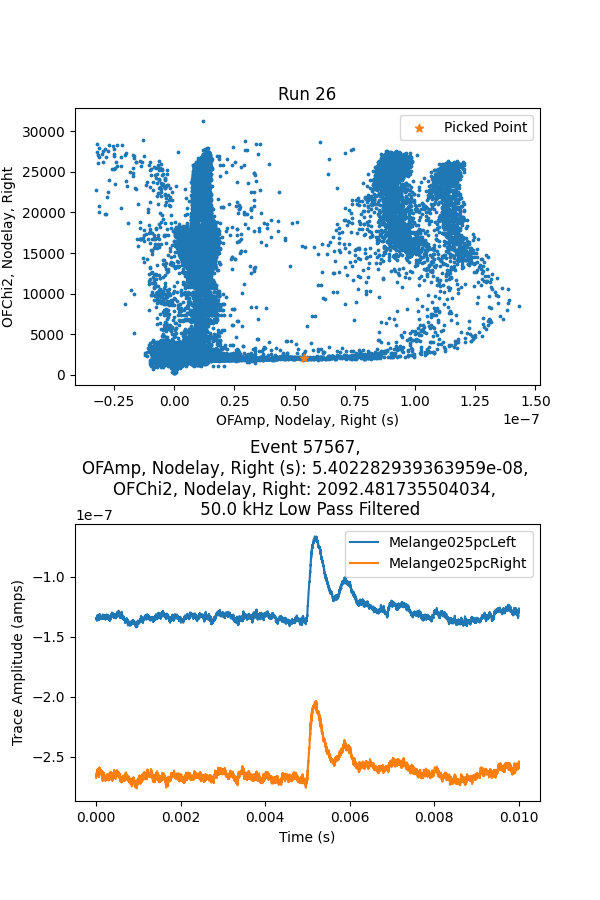

 
-----------------
 


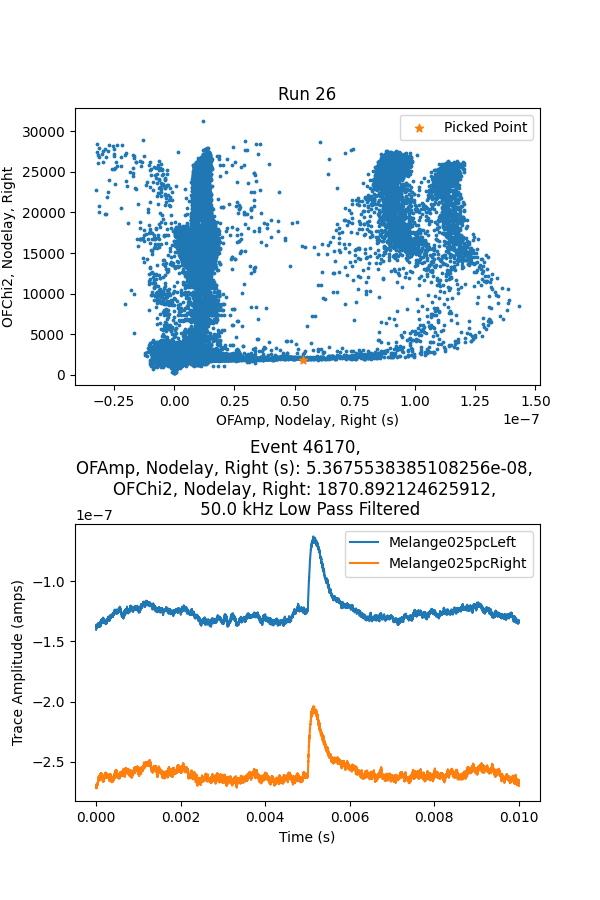

 
-----------------
 


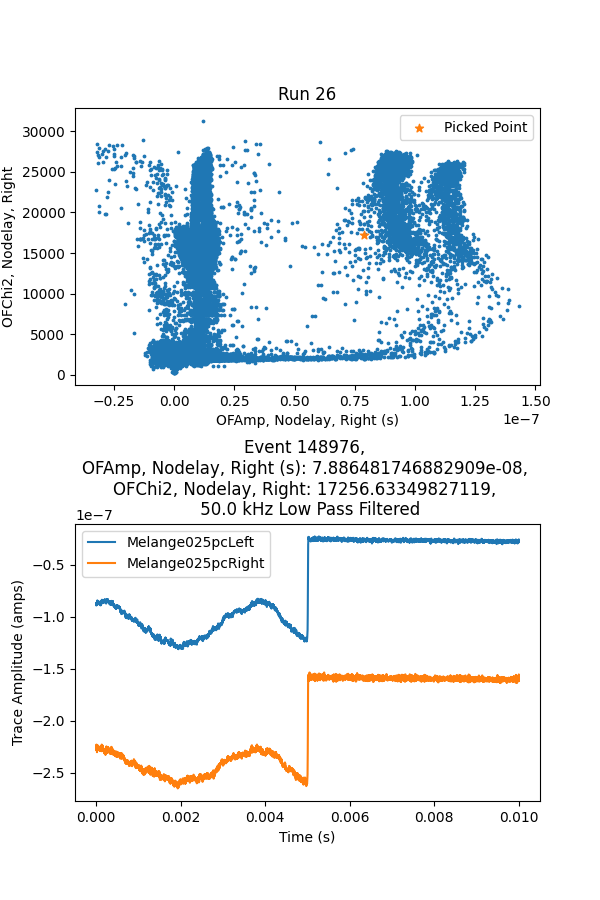

 
-----------------
 


In [14]:
SP.trace_inds_to_plot = [2, 3]
SP.trace_inds_labels = ['Melange025pcLeft', 'Melange025pcRight']
SP.plot_picked_events(lpcutoff=50e3,trace_length_msec=10, pretrigger_length_msec=5)

Note also that you can zoom and pan using the graphical tools for each plot.

This is a work in progress, if you want new features, feel free to build them yourself!